# Plotting Query Results

## Setup

In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///bigfoot.sqlite", echo=False)

## Explore Database

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['bigfoot']

In [6]:
# Get a list of column names and types
columns = inspector.get_columns('bigfoot')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
number INTEGER
title TEXT
classification TEXT
timestamp TEXT
latitude FLOAT
longitude FLOAT


In [7]:
engine.execute('SELECT * FROM bigfoot LIMIT 5').fetchall()

[(1, 637, "Report 637: Campers' encounter just after dark in the Wrangell - St. Elias National Park and Preserve", 'Class A', '2000-06-16T12:00:00Z', 61.5, -142.9),
 (2, 2917, 'Report 2917: Family observes large biped from car', 'Class A', '1995-05-15T12:00:00Z', 55.1872, -132.7982),
 (3, 7963, 'Report 7963: Sasquatch walks past window of house at night', 'Class A', '2004-02-09T12:00:00Z', 55.2035, -132.8202),
 (4, 9317, 'Report 9317: Driver on Alcan Highway has noon, road encounter near Alaska-Canada border', 'Class A', '2004-06-18T12:00:00Z', 62.9375, -141.5667),
 (5, 13038, 'Report 13038: Snowmobiler has encounter in deep snow near Potter, AK', 'Class A', '2004-02-15T12:00:00Z', 61.0595, -149.7853)]

## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Bigfoot = Base.classes.bigfoot

In [9]:
session = Session(engine)

Count sightings by month

In [10]:
# `Month` and `Sightings Count`
results = session.query(func.strftime("%m", Bigfoot.timestamp), func.count(Bigfoot.timestamp)).\
    group_by(func.strftime("%m", Bigfoot.timestamp)).all()
results[:5]

[('01', 247), ('02', 160), ('03', 172), ('04', 214), ('05', 258)]

Unpack tuples using list comprehensions

In [11]:
months = [int(row[0]) for row in results]
sightings = [row[1] for row in results]

## Plot using Matplotlib

<IPython.core.display.Javascript object>


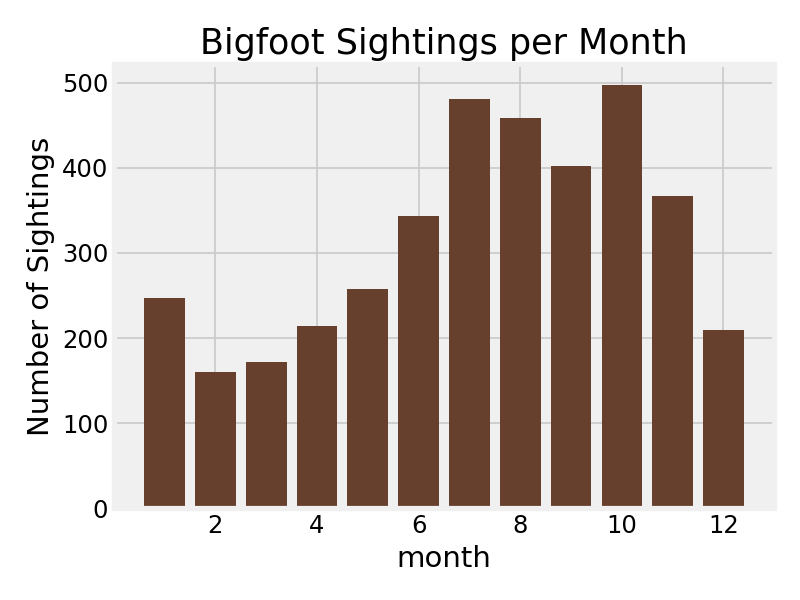

In [12]:
fig, ax = plt.subplots()
ax.bar(months, sightings, color="#663f2d")
ax.set_xlabel("month")
ax.set_ylabel("Number of Sightings")
ax.set_title("Bigfoot Sightings per Month")
fig.tight_layout()
fig.show()

## Plot using Pandas Plotting

Load results into Pandas

In [13]:
df = pd.DataFrame(results, columns=['months', 'sightings'])
df.set_index('months', inplace=True)
df.head()

,sightings
months,
01,247
02,160
03,172
04,214
05,258


Plot using Pandas

<IPython.core.display.Javascript object>


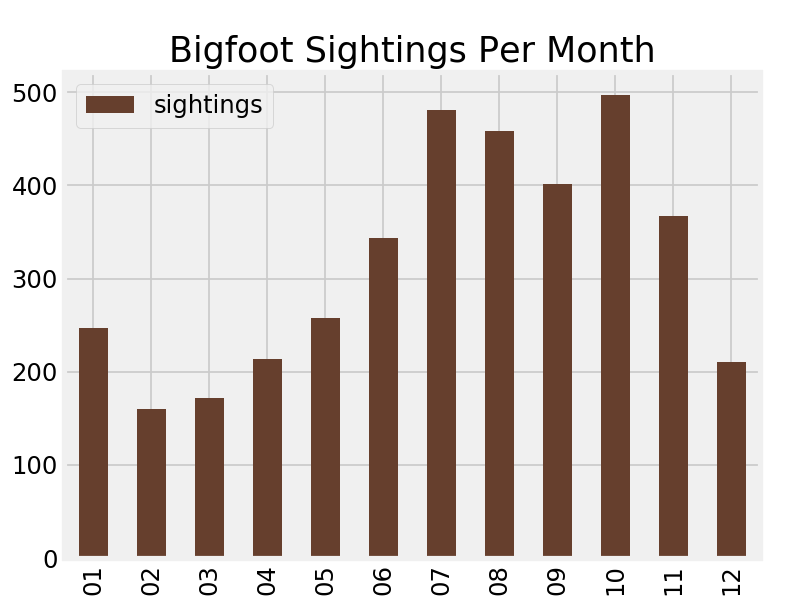

In [14]:
df.plot.bar(title="Bigfoot Sightings Per Month", color="#663f2d")
plt.show()

## Your Turn!